# Luento 3: Kuvaileva analytiikka (osa 2, tilastolliset tunnusluvut, 28.1.2026)

Seuraillaan melko tarkasti Moodlesta löytyvää tilastollisia tunnuslukuja käsittelevää muistioita.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Tuodaan data

In [3]:
df = pd.read_excel("data1.xlsx")
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [4]:
# korvataan lyhenteet muuttujien nimissä
df = df.rename(columns={"palveluv": "palveluvuodet", "johto": "johtoon", "työtov": "työtovereihin", "työymp": "työympäristöön", "palkkat": "palkkaan", "työteht": "työtehtäviin"})

df.head()

,nro,sukup,ikä,perhe,koulutus,palveluvuodet,palkka,johtoon,työtovereihin,työympäristöön,palkkaan,työtehtäviin,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


## Lasketaan tunnuslukuja describe-metodilla

In [5]:
# lasketaan tunnuslukuja kaikille muuttujille

df.describe().style.format(precision=1)

,nro,sukup,ikä,perhe,koulutus,palveluvuodet,palkka,johtoon,työtovereihin,työympäristöön,palkkaan,työtehtäviin,työterv,lomaosa,kuntosa,hieroja
count,82.0,82.0,82.0,82.0,81.0,80.0,82.0,82.0,81.0,82.0,82.0,82.0,47.0,20.0,9.0,22.0
mean,41.5,1.2,38.0,1.6,2.0,12.2,2563.9,3.1,4.1,3.2,2.1,3.2,1.0,1.0,1.0,1.0
std,23.8,0.4,9.8,0.5,0.8,8.8,849.4,1.1,0.8,1.2,1.1,1.0,0.0,0.0,0.0,0.0
min,1.0,1.0,20.0,1.0,1.0,0.0,1521.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,21.2,1.0,31.0,1.0,1.0,3.8,2027.0,2.0,4.0,3.0,1.0,3.0,1.0,1.0,1.0,1.0
50%,41.5,1.0,37.5,2.0,2.0,12.5,2320.0,3.0,4.0,3.0,2.0,3.0,1.0,1.0,1.0,1.0
75%,61.8,1.0,44.0,2.0,3.0,18.2,2808.0,4.0,5.0,4.0,3.0,4.0,1.0,1.0,1.0,1.0
max,82.0,2.0,61.0,2.0,4.0,36.0,6278.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0


In [6]:
# lasketaan tilastollisia tunnuslukuja tietyille muuttujille

df1 = df[["ikä", "palveluvuodet", "palkka"]].describe()

# tunnuslukujen suomenkieliset nimet
tunnusluvut = ["lukumäärä", "keskiarvo", "keskihajonta", "pienin", "alakvartiili", "mediaani", "yläkvartiili", "suurin"]

df1.index = tunnusluvut

df1

,ikä,palveluvuodet,palkka
lukumäärä,82.000000,80.000000,82.000000
keskiarvo,37.951220,12.175000,2563.878049
keskihajonta,9.773866,8.807038,849.350302
pienin,20.000000,0.000000,1521.000000
alakvartiili,31.000000,3.750000,2027.000000
mediaani,37.500000,12.500000,2320.000000
yläkvartiili,44.000000,18.250000,2808.000000
suurin,61.000000,36.000000,6278.000000


In [7]:
df2 = df.loc[: , "johtoon": "työtehtäviin"].describe()

# suomennos
df2.index = tunnusluvut

df2 = df2.sort_values("keskiarvo", axis=1, ascending=False)

df2

,työtovereihin,työympäristöön,työtehtäviin,johtoon,palkkaan
lukumäärä,81.000000,82.000000,82.000000,82.000000,82.000000
keskiarvo,4.061728,3.219512,3.195122,3.060976,2.109756
keskihajonta,0.826826,1.154961,1.047502,1.058155,1.111179
pienin,2.000000,1.000000,1.000000,1.000000,1.000000
alakvartiili,4.000000,3.000000,3.000000,2.000000,1.000000
mediaani,4.000000,3.000000,3.000000,3.000000,2.000000
yläkvartiili,5.000000,4.000000,4.000000,4.000000,3.000000
suurin,5.000000,5.000000,5.000000,5.000000,5.000000


In [8]:
# transponoidaan edellä luotu taulukko
df3 = df2.T
df3

,lukumäärä,keskiarvo,keskihajonta,pienin,alakvartiili,mediaani,yläkvartiili,suurin
työtovereihin,81.0,4.061728,0.826826,2.0,4.0,4.0,5.0,5.0
työympäristöön,82.0,3.219512,1.154961,1.0,3.0,3.0,4.0,5.0
työtehtäviin,82.0,3.195122,1.047502,1.0,3.0,3.0,4.0,5.0
johtoon,82.0,3.060976,1.058155,1.0,2.0,3.0,4.0,5.0
palkkaan,82.0,2.109756,1.111179,1.0,1.0,2.0,3.0,5.0


In [9]:
# muokataan desimaalien lukumäärää
df3.style.format(precision=1).format(precision=0, subset=["lukumäärä", "pienin", "suurin"])

,lukumäärä,keskiarvo,keskihajonta,pienin,alakvartiili,mediaani,yläkvartiili,suurin
työtovereihin,81,4.1,0.8,2,4.0,4.0,5.0,5
työympäristöön,82,3.2,1.2,1,3.0,3.0,4.0,5
työtehtäviin,82,3.2,1.0,1,3.0,3.0,4.0,5
johtoon,82,3.1,1.1,1,2.0,3.0,4.0,5
palkkaan,82,2.1,1.1,1,1.0,2.0,3.0,5


Text(0.5, 0, 'Palkka, n = 82')

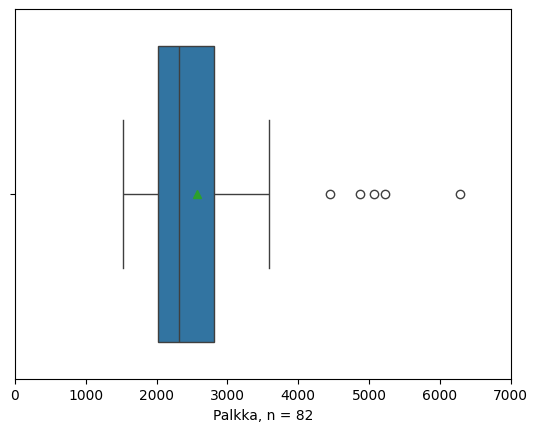

In [15]:
# laatikkojanakuvio palkalle
sns.boxplot(data=df, x="palkka", showmeans=True)

# x-akselin alku ja loppu
plt.xlim([0, 7000])

# lasketaan n-arvo
n_palkka = df["palkka"].count()

# x-akselin otsikko
plt.xlabel(f"Palkka, n = {n_palkka}")

Laaditaan kaavio, jossa on laatikkojanakuvio kunkin tyytyväisyysmuuttujan jakaumalle.

In [19]:
# tyytyväisyysmuuttujien lista keskiarvon mukaisessa järjestyksessä
lista = df.loc[: , "johtoon": "työtehtäviin"].mean().sort_values(ascending=False).index
lista

Index(['työtovereihin', 'työympäristöön', 'työtehtäviin', 'johtoon',
       'palkkaan'],
      dtype='object')

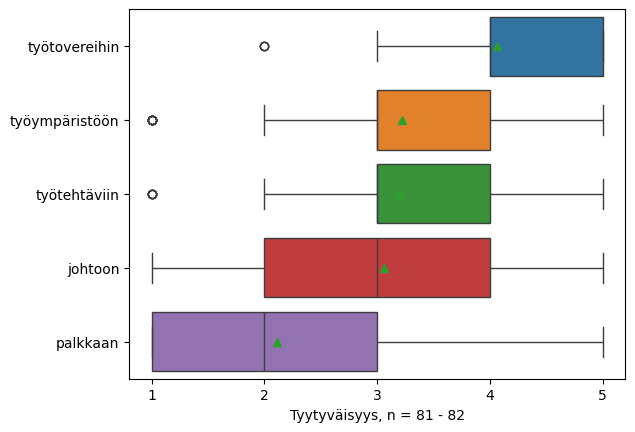

In [27]:
# laaditaan tyytyväisyysmuuttujille laatikkojanakuviot tässä järjestyksessä
sns.boxplot(data=df[lista], orient="h", showmeans=True)

# muokataan x-akselille pelkät kokonaisluvut
plt.xticks([1, 2, 3, 4, 5])

# lasketaan n-arvojen suurin ja pienin arvo
n_min = df3["lukumäärä"].min()
n_max = df3["lukumäärä"].max()

# x-akselille otsiko
plt.xlabel(f"Tyytyväisyys, n = {n_min:.0f} - {n_max:.0f}")

# pelkkä kuva
plt.show()

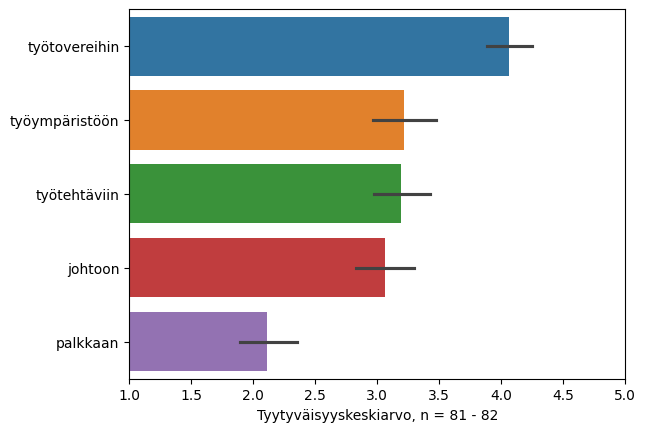

In [33]:
# palkkikaavio keskiarcosta virhemarginaaleilla
sns.barplot(data=df[lista], orient="h")

# muokataan x-akselia
plt.xlim([1, 5])

# x-akselin otsikko näkyviin
plt.xlabel(f"Tyytyväisyyskeskiarvo, n = {n_min:.0f} - {n_max:.0f}")

plt.show()